In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("./WineQT.csv")
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
dataframe["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

# Data Preprocessing

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [7]:
dataframe.shape

(1143, 12)

In [8]:
dataframe.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Splitting of Data

In [9]:
# Splitting of Data
X = dataframe.drop(columns=["quality"], axis=1)
y = dataframe["quality"]
X.shape, y.shape

((1143, 11), (1143,))

# EDA

In [10]:
dataframe.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


<Axes: >

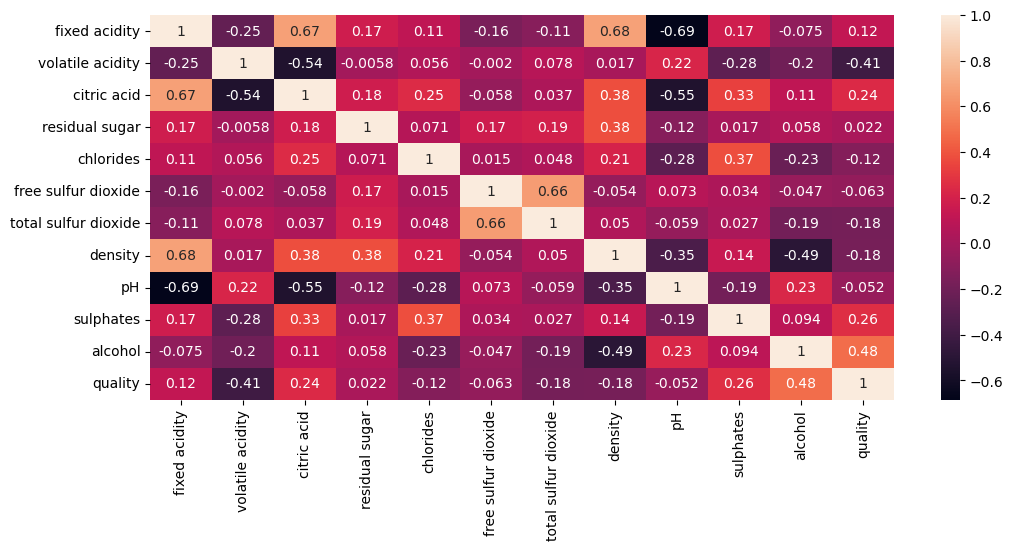

In [11]:
plt.figure(figsize=(12, 5))
sns.heatmap(dataframe.corr(), annot=True)
# plt.savefig("./DecisionTree_Heatmap.jpg")

In [12]:
# Highly Correlated
def high_corr(dataframe, threshold):
    corr_cols = set()
    dataframe_corr = dataframe.corr()
    for i in range(len(dataframe_corr.columns)):
        for j in range(i + 1, len(dataframe_corr.columns)):
            if abs(dataframe_corr.iloc[i, j]) >= threshold:
                corr_cols.add(dataframe_corr.columns[i])
                corr_cols.add(dataframe_corr.columns[j])
    return corr_cols


high_corr(dataframe, 0.85)

set()

<Axes: >

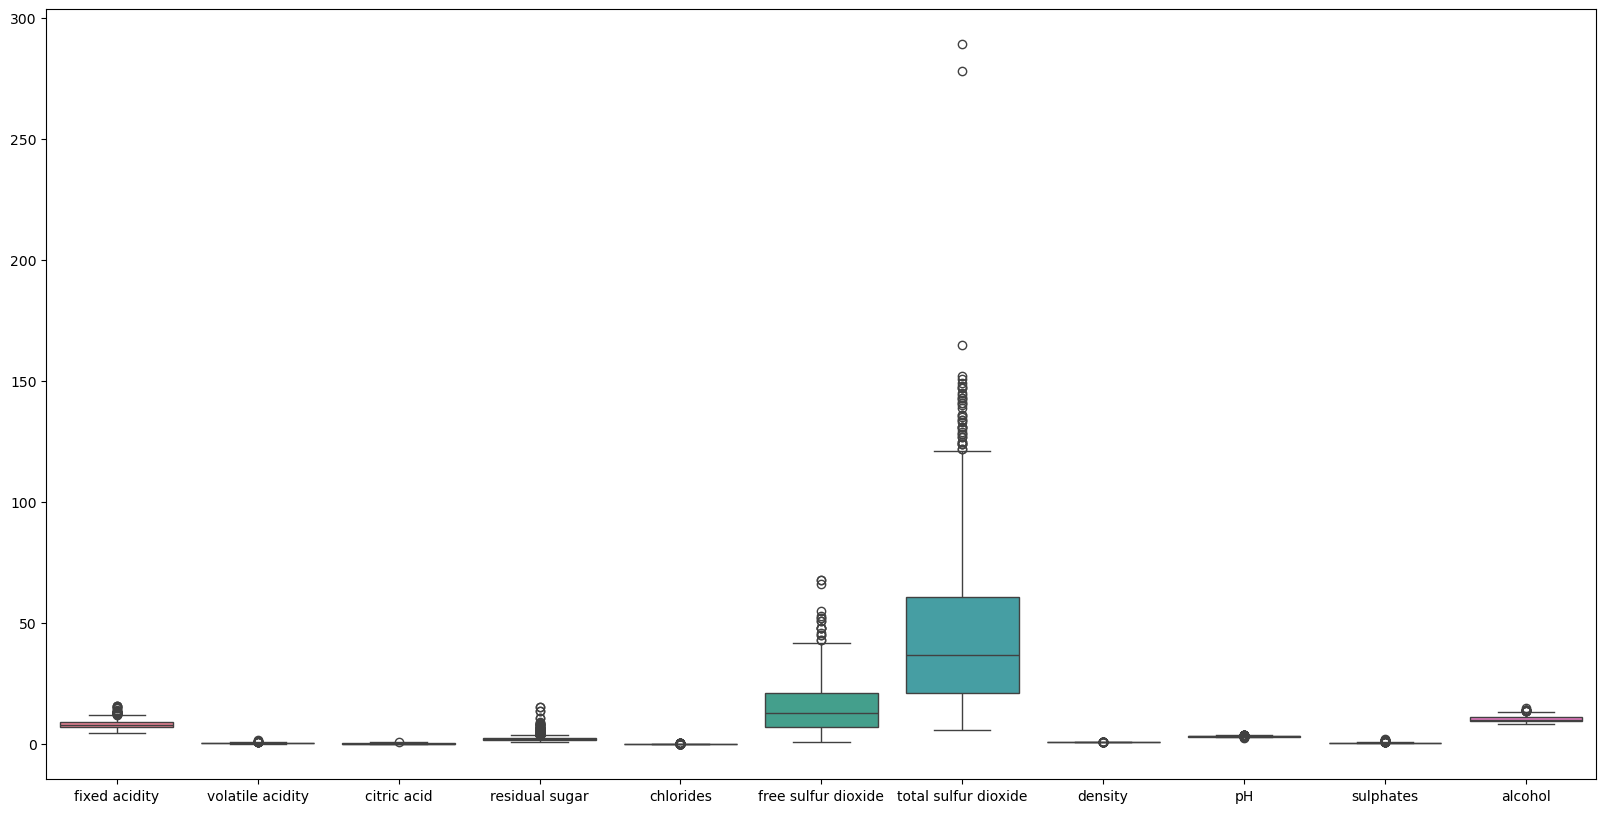

In [13]:
plt.figure(figsize=(20, 10))
sns.boxplot(X)

In [14]:
dataframe.tail(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1128,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6
1129,6.8,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6
1130,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
1131,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1132,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1133,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7
1134,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6
1135,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6
1136,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1137,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6


## Removing Outliers

In [15]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "density",
    "pH",
    "sulphates",
    "alcohol",
]


mask = np.ones(X.shape[0], dtype=bool)
for col in cols:
    q1 = np.percentile(X[col], 25)
    q3 = np.percentile(X[col], 75)
    IQR = q3 - q1
    lowerWhisker = q1 - 1.5 * IQR
    upperWhisker = q3 + 1.5 * IQR
    mask &= (X[col] >= lowerWhisker) & (X[col] <= upperWhisker)

X_outlier1 = X[mask]
y_outlier1 = y[mask]

print(X.shape, y.shape, X_outlier1.shape, y_outlier1.shape)
# X_outlier1.reset_index(drop=True,inplace=True)
# y_outlier1.reset_index(drop=True,inplace=True)

(1143, 11) (1143,) (883, 11) (883,)


<Axes: >

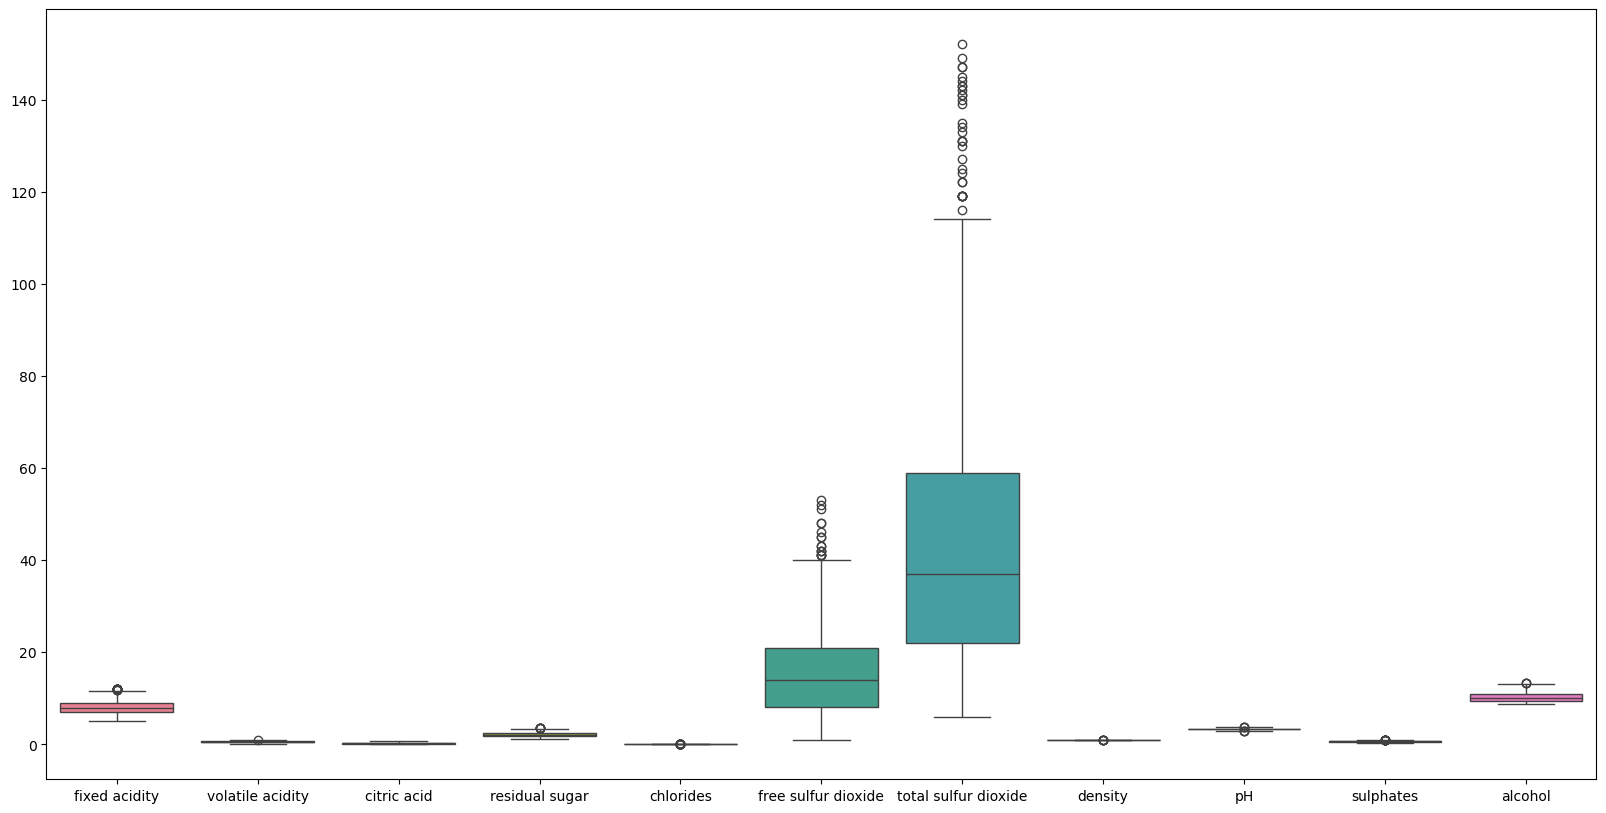

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(X_outlier1)

In [18]:
# Outlier Removal 2
# 'free sulfur dioxide', 'total sulfur dioxide',

q = np.percentile(X_outlier1["free sulfur dioxide"], 99)
mask = X_outlier1["free sulfur dioxide"] < q
X_outlier2 = X_outlier1[mask]
y_outlier2 = y_outlier1[mask]

X_outlier2.shape, y_outlier2.shape

((873, 11), (873,))

<Axes: >

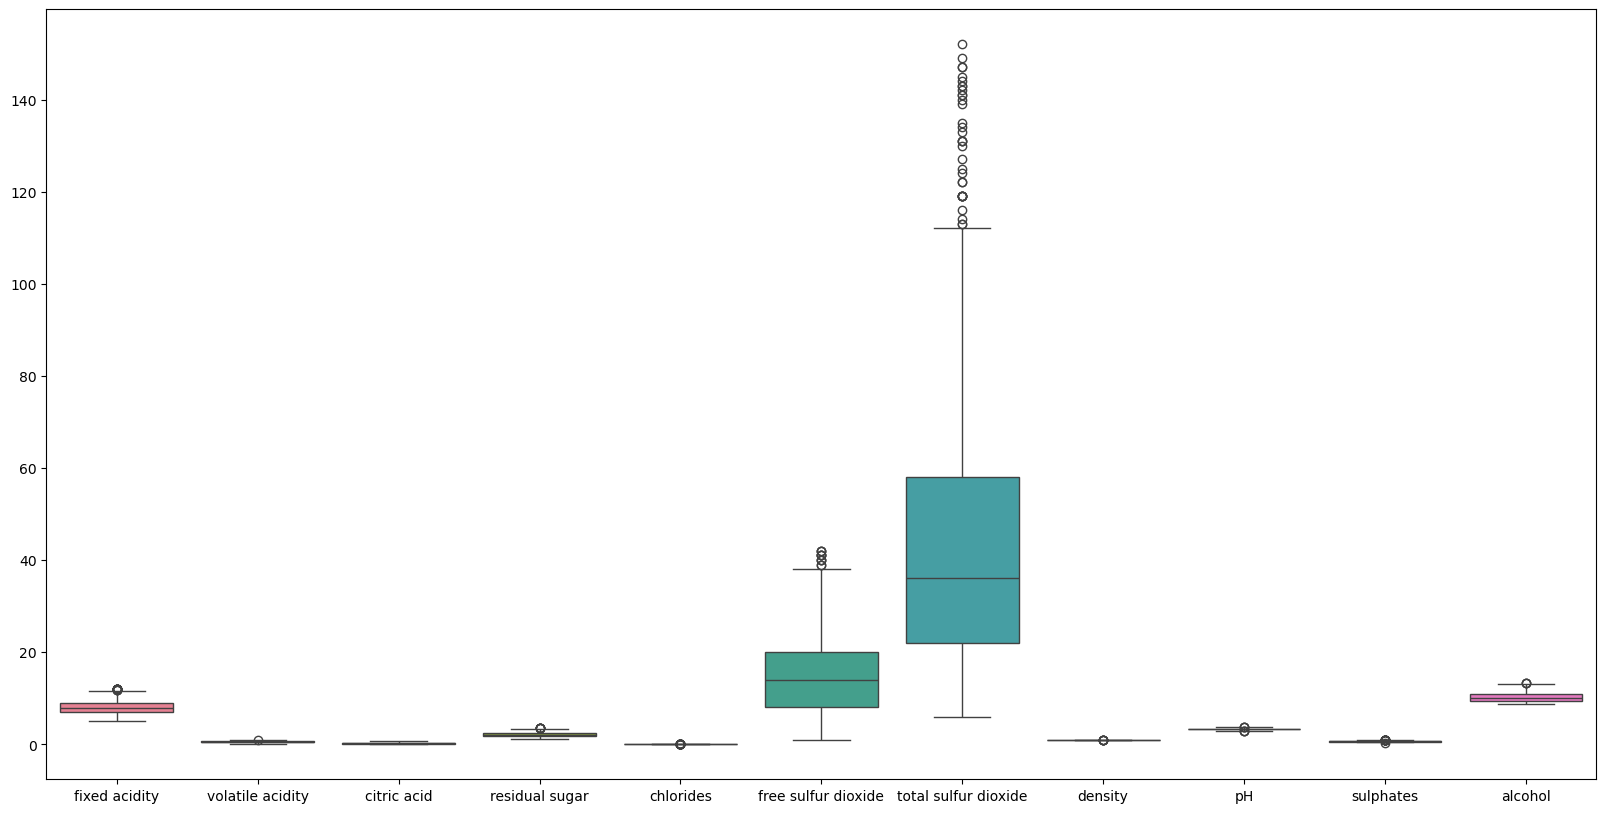

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(X_outlier2)

In [20]:
q2 = np.percentile(X_outlier2["total sulfur dioxide"], 99)
mask2 = X_outlier2["total sulfur dioxide"] < q2
X_outlier3 = X_outlier2[mask2]
y_outlier3 = y_outlier2[mask2]

X_outlier3.shape, y_outlier3.shape

((864, 11), (864,))

<Axes: >

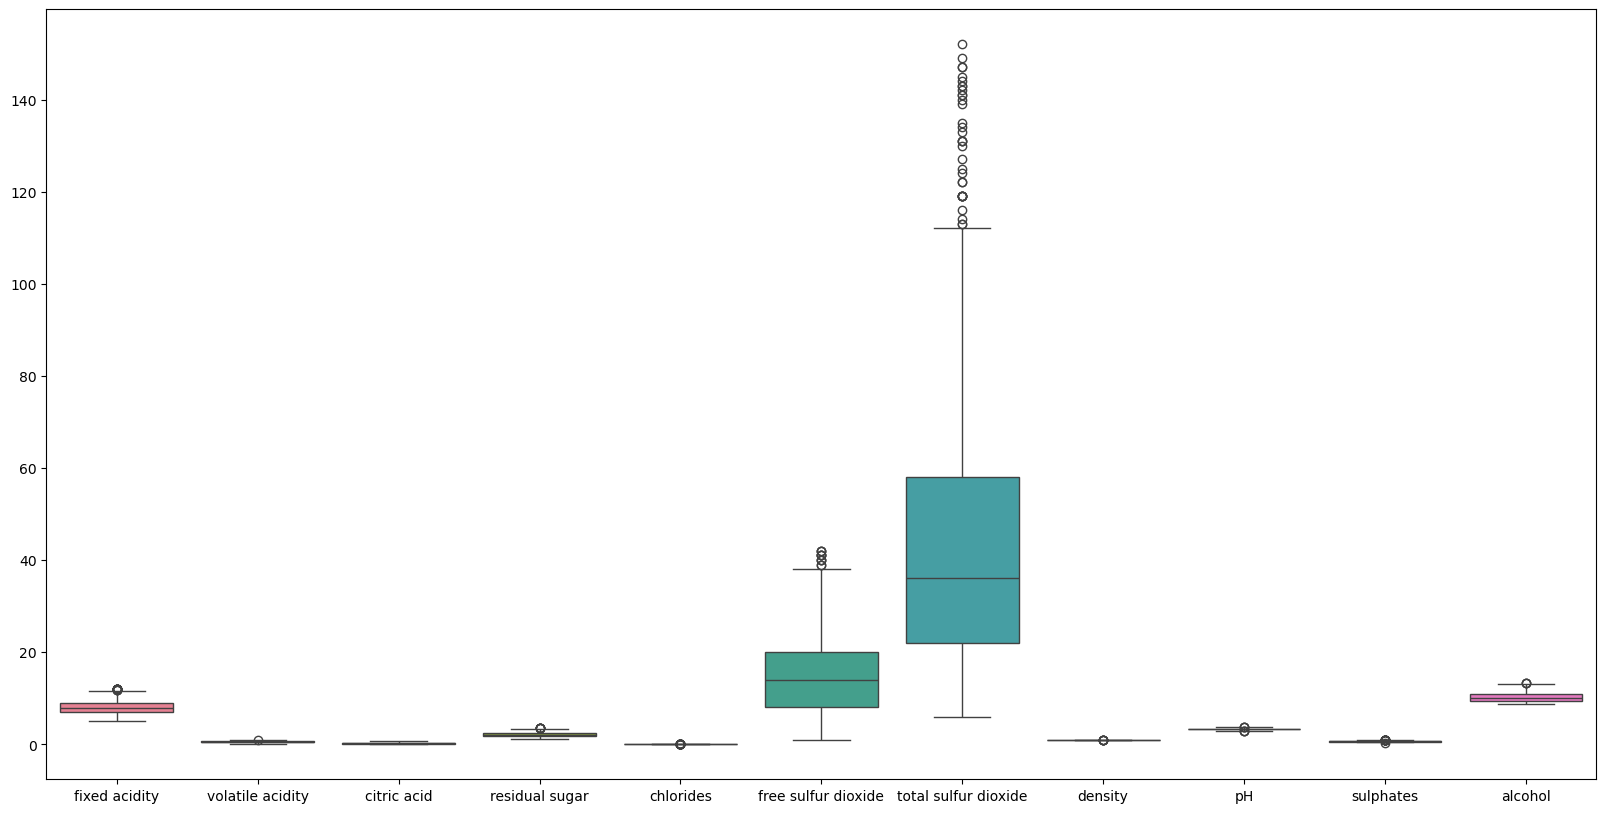

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(X_outlier2)

In [22]:
print(y.value_counts())
print(y_outlier3.value_counts())

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64
quality
5    378
6    359
7     94
4     19
8     11
3      3
Name: count, dtype: int64


In [23]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


#  Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [25]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_outlier1, y_outlier1, test_size=0.25, random_state=42
)

In [26]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_outlier3, y_outlier3, test_size=0.35, random_state=42
)

# Scaling Data

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

In [80]:
y_train3.value_counts()

quality
6    248
5    233
7     65
4      7
8      6
3      2
Name: count, dtype: int64

In [81]:
X_train3_scaled.shape, y_train3.shape

((561, 11), (561,))

In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)

X_train3_scaled, y_train3 = smote.fit_resample(X_train3_scaled, y_train3)
y_train3.value_counts()

quality
6    248
5    248
4    248
7    248
8    248
3    248
Name: count, dtype: int64

# Model Training

In [86]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight="balanced", random_state=42)

model.fit(X_train3_scaled, y_train3)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [87]:
model.feature_importances_

array([0.03288499, 0.1754895 , 0.04225937, 0.03760959, 0.06047352,
       0.03704586, 0.23102248, 0.01179537, 0.09175773, 0.10220113,
       0.17746046])

In [88]:
# Model Prediction
y_pred = model.predict(X_test3_scaled)

In [89]:
y_pred

array([5, 6, 7, 6, 7, 6, 7, 5, 6, 5, 4, 7, 5, 7, 6, 7, 6, 7, 5, 5, 6, 6,
       6, 7, 5, 5, 5, 6, 7, 5, 6, 5, 6, 5, 7, 7, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 8, 6, 6, 6, 6, 7, 6, 7, 6,
       6, 5, 7, 5, 8, 6, 7, 7, 6, 7, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 5, 6, 5, 7, 6, 6, 6, 5,
       5, 5, 7, 5, 5, 7, 5, 6, 5, 5, 7, 7, 5, 6, 5, 5, 6, 5, 7, 6, 6, 6,
       5, 4, 6, 5, 6, 5, 6, 8, 6, 8, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6,
       6, 5, 5, 8, 6, 7, 5, 3, 6, 5, 6, 5, 6, 5, 6, 5, 5, 4, 6, 5, 6, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 7, 5, 7, 5, 5, 5, 5, 6,
       6, 6, 5, 5, 6, 5, 5, 7, 5, 5, 5, 5, 7, 5, 6, 5, 6, 6, 8, 5, 6, 6,
       7, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 4, 5, 6, 6, 5, 4, 7, 6, 5,
       6, 7, 7, 5, 5, 6, 5, 5, 4, 7, 5, 5, 5, 8, 5, 5, 6, 6, 6, 6, 5, 6,
       5, 6, 5, 6, 6, 5, 7, 5, 4, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 4, 7, 6,
       6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6,

# Model Performance

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test3, y_pred))

"""
			  precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.65      0.62      0.64       121
           6       0.51      0.51      0.51       121
           7       0.48      0.44      0.46        34
           8       0.33      0.67      0.44         3

    accuracy                           0.54       286
   macro avg       0.33      0.37      0.34       286
weighted avg       0.55      0.54      0.55       286
"""

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.17      0.20        12
           5       0.68      0.59      0.63       145
           6       0.46      0.50      0.48       111
           7       0.30      0.41      0.35        29
           8       0.14      0.20      0.17         5

    accuracy                           0.52       303
   macro avg       0.31      0.31      0.31       303
weighted avg       0.54      0.52      0.52       303



'\n\t\t\t  precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         0\n           4       0.00      0.00      0.00         7\n           5       0.65      0.62      0.64       121\n           6       0.51      0.51      0.51       121\n           7       0.48      0.44      0.46        34\n           8       0.33      0.67      0.44         3\n\n    accuracy                           0.54       286\n   macro avg       0.33      0.37      0.34       286\nweighted avg       0.55      0.54      0.55       286\n'

# Plotting Tree

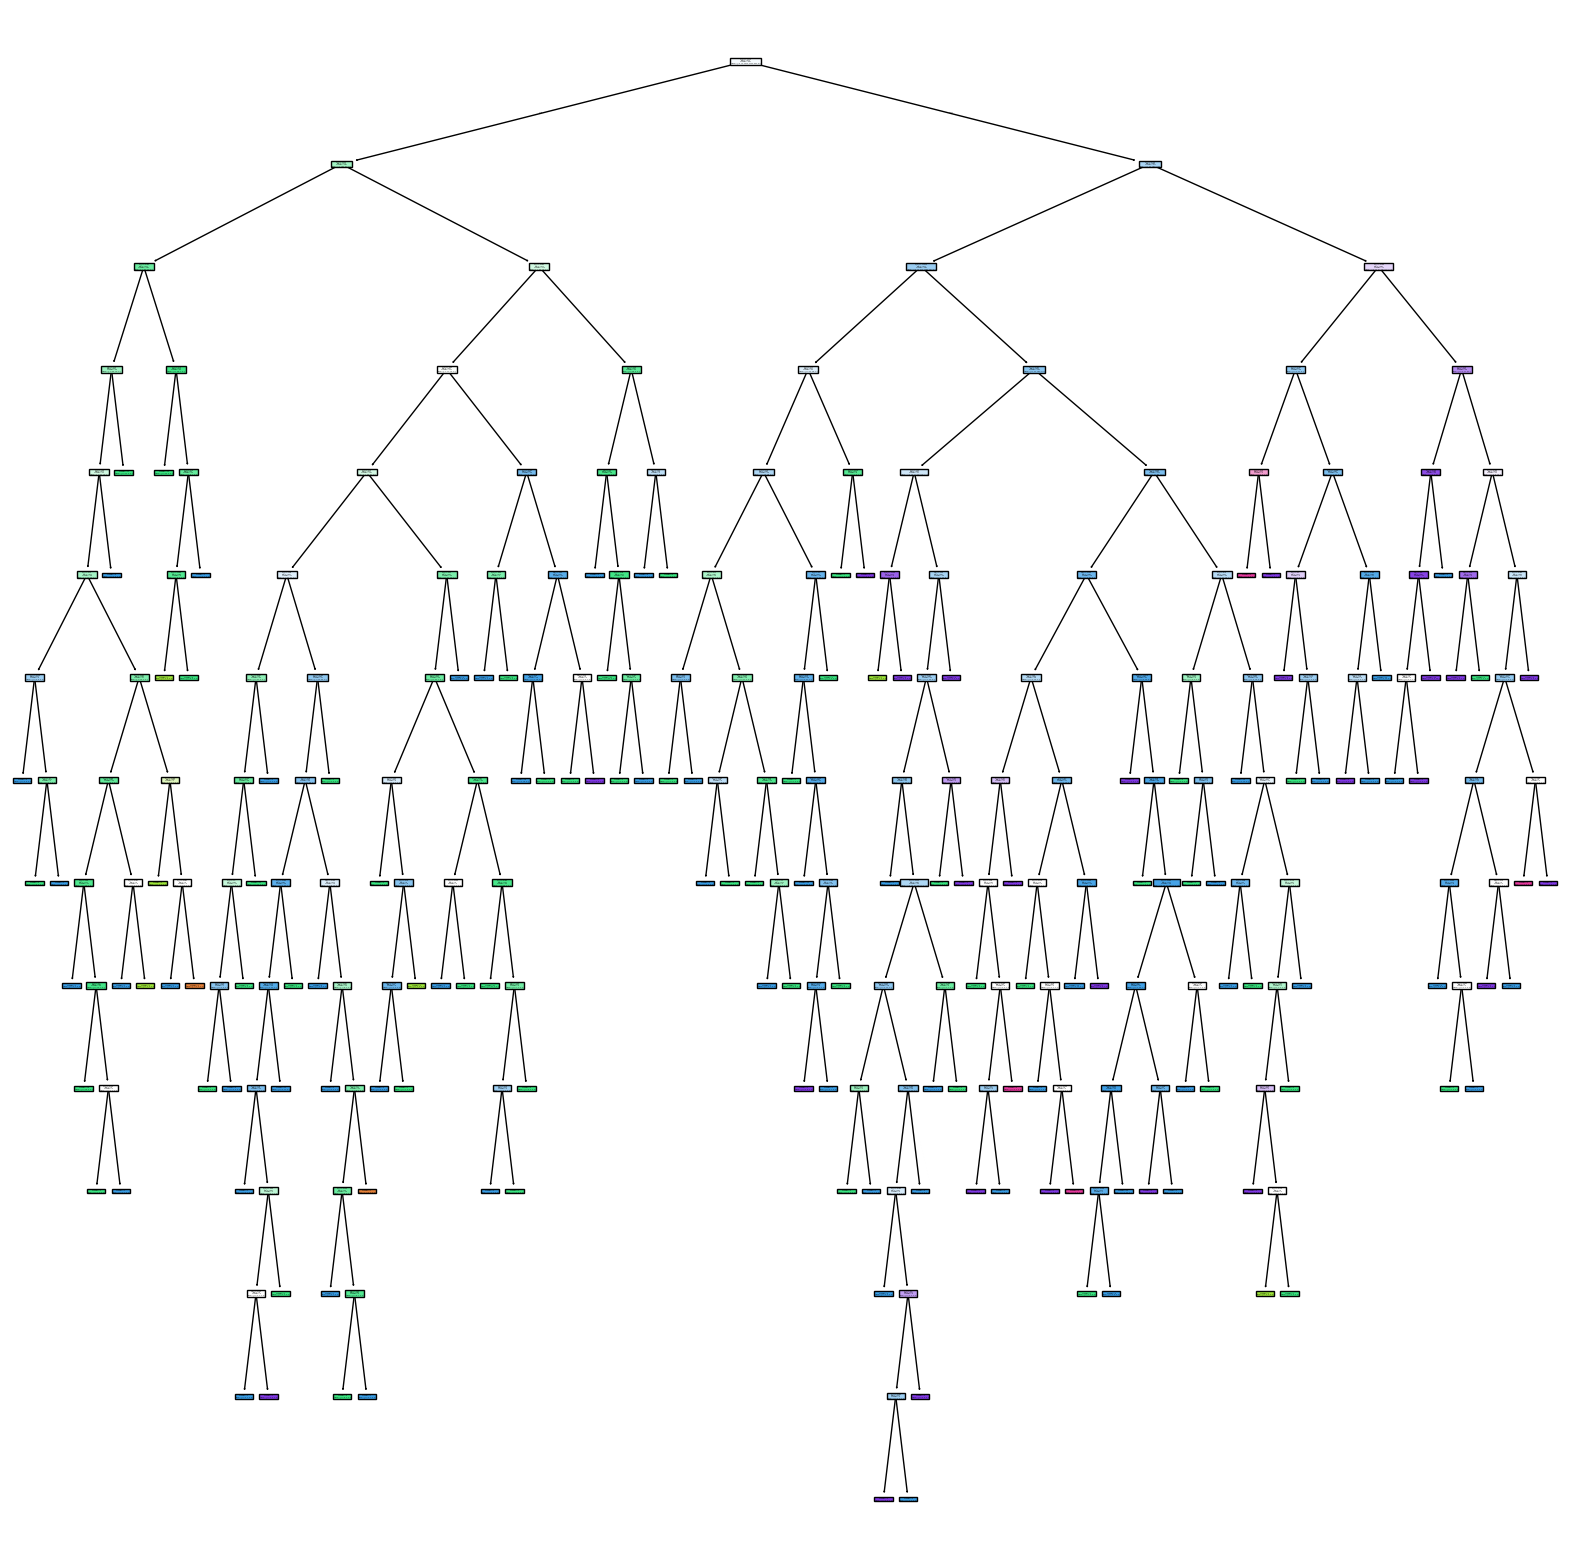

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model, filled=True)
plt.savefig("./DecisionTree_plot_tree.jpg")

# Plotting for top 20 Data 

In [92]:
sampleData = dataframe.head(20)
sampleData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [94]:
sampleData["quality"].unique()

array([5, 6, 7])

In [95]:
X_sample = sampleData.drop(columns=["quality"], axis=1)
y_sample = sampleData["quality"]

In [96]:
sampleModel = DecisionTreeClassifier()
sampleModel.fit(X_sample, y_sample)

DecisionTreeClassifier()

In [97]:
sampleModel.feature_importances_

array([0.        , 0.        , 0.30002108, 0.0921659 , 0.21354778,
       0.14336918, 0.10752688, 0.        , 0.14336918, 0.        ,
       0.        ])

[Text(0.5909090909090909, 0.9, 'x[2] <= 0.41\ngini = 0.465\nsamples = 20\nvalue = [14, 3, 3]'),
 Text(0.36363636363636365, 0.7, 'x[4] <= 0.074\ngini = 0.304\nsamples = 17\nvalue = [14, 1, 2]'),
 Text(0.4772727272727273, 0.8, 'True  '),
 Text(0.18181818181818182, 0.5, 'x[8] <= 3.33\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5454545454545454, 0.5, 'x[3] <= 2.35\ngini = 0.133\nsamples = 14\nvalue = [13, 1, 0]'),
 Text(0.45454545454545453, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.6363636363636364, 0.3, 'x[6] <= 53.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.5454545454545454, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.7272727272727273, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8181818181818182, 0.7, 'x[5] <= 26.0\ngini = 0.444\nsamples = 3\nvalue = [0, 2,

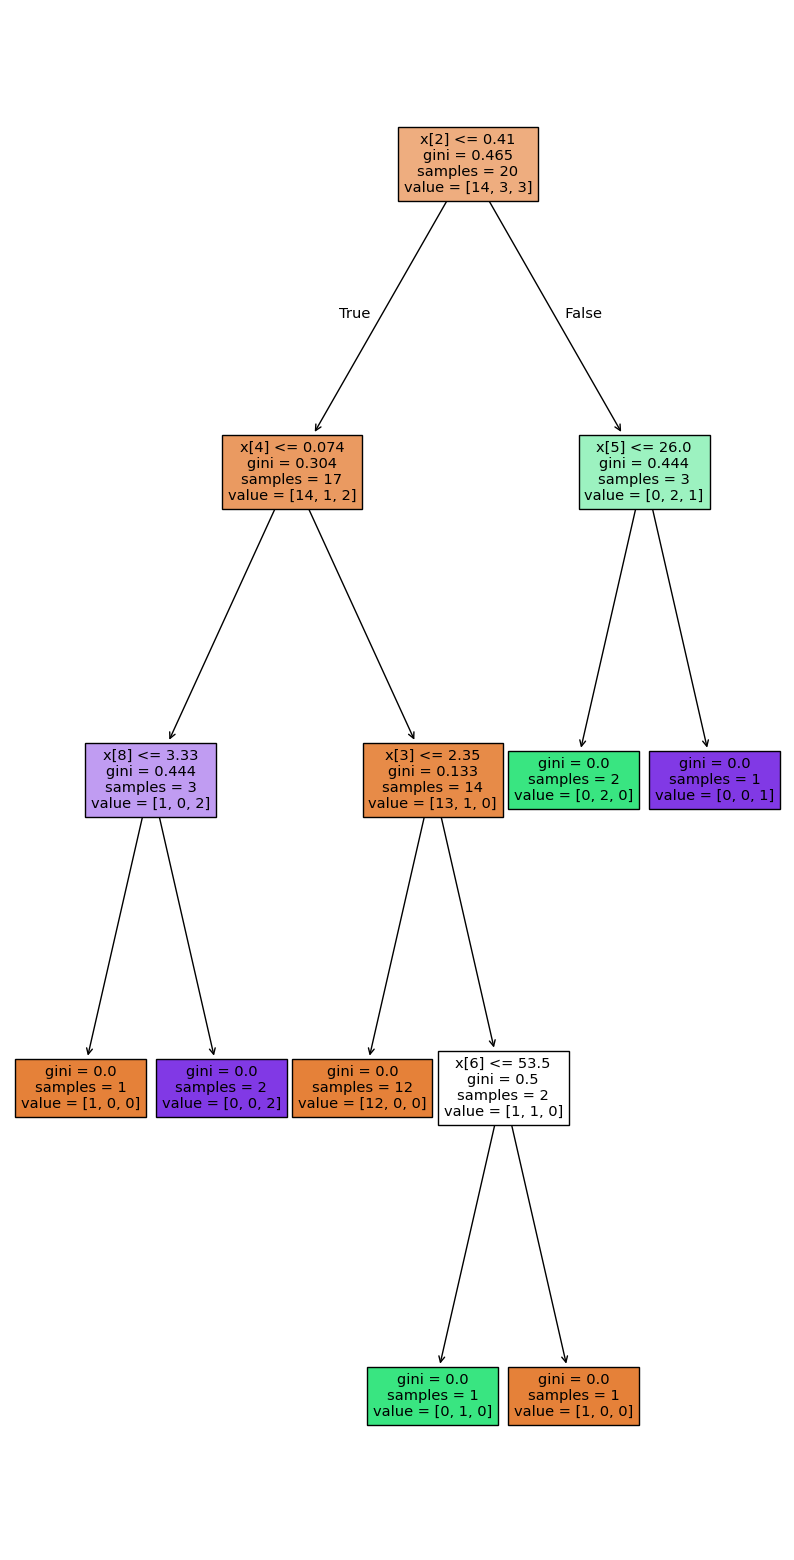

In [98]:
plt.figure(figsize=(10, 20))
plot_tree(sampleModel, filled=True)